In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
df = pd.read_csv("MI_DB.csv", index_col=0)
# Replace to NaN and convert to float
df = df.replace("?", np.nan)
df = df.apply(pd.to_numeric)

Text(0.5, 1.0, 'Entry count for each feature')

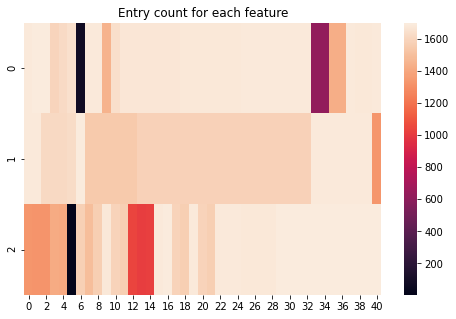

In [233]:
sns.heatmap(np.split(df.count().to_numpy(),3))
plt.title("Entry count for each feature")

### Filter out columns with too much NA values

In [234]:
record_count = df.count().to_numpy()
indexes_high_na = np.where( record_count < 1700/2)[0]


In [237]:
name_dropped = df.columns[indexes_high_na].to_numpy() #Keep track of the names of the columns we drop


In [238]:
df = df.drop(df.columns[indexes_high_na], axis = 1)

len(df.count().to_numpy())

119

Text(0.5, 1.0, 'Entry count for each feature')

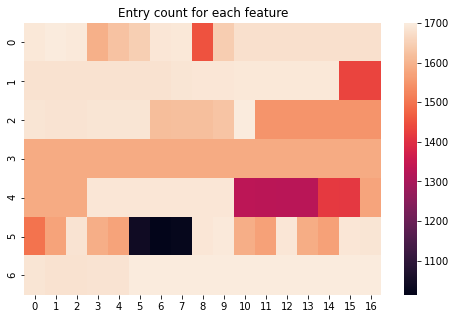

In [239]:
sns.heatmap(np.split(df.count().to_numpy(),7))
plt.title("Entry count for each feature")

### Fitlers rows with too much NA

In [240]:
df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
ID,,,,,,,,,,,,,,,,,,,,,
1,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,...,0,0,0,0,0,0,1,0,0,0
5,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,77.0,0,0.0,4.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1697,70.0,0,0.0,6.0,2.0,1.0,2.0,0.0,7.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1698,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6


In [241]:
treshold_na = int(0.3*119) # if more that 50% of missing values, get rid of the row (59)
print("Treshold:",treshold_na)


Treshold: 35


In [242]:
def calculate_NA(row):
    return row.isna().sum().sum()

df["n_NA"] = df.apply(calculate_NA, axis=1)

In [243]:
np.max(df["n_NA"])

58

In [244]:
df = df.drop(df[df["n_NA"] > treshold_na].index)

In [245]:
df = df.drop(["n_NA"], axis=1)

In [246]:
df.count()

AGE          1680
SEX          1688
INF_ANAM     1685
STENOK_AN    1587
FK_STENOK    1620
             ... 
DRESSLER     1688
ZSN          1688
REC_IM       1688
P_IM_STEN    1688
LET_IS       1688
Length: 119, dtype: int64

#### We dropped 12 rows because they had more than 30% missing values



## Add column dead or not dead

In [247]:
df["DEAD"] = df["LET_IS"].apply(lambda x: 1 if x > 0 else 0)

<AxesSubplot:xlabel='DEAD', ylabel='Count'>

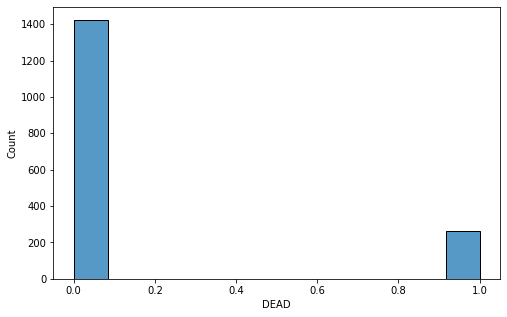

In [280]:
sns.histplot(df["DEAD"])

### Separate features by type (ordinal/binary/numeric)

In [282]:
numeric_attributes = ["AGE","S_AD_KBRIG","D_AD_KBRIG","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD",
                      "ALT_BLOOD","AST_BLOOD","KFK_BLOOD","L_BLOOD","ROE"]

numeric_attributes = [x for x in numeric_attributes if x not in name_dropped]

ord_attributes = ["INF_ANAM","STENOK_AN","FK_STENOK","IBS_POST","GB","DLIT_AG","ZSN_A",
                  "ant_im","lat_im","inf_im","post_im","R_AB_1_n","NA_R_1_n","NOT_NA_1_n",
                 "R_AB_2_n","NA_R_2_n","NOT_NA_2_n","R_AB_3_n","NA_R_3_n","NOT_NA_3_n","TIME_B_S"]


ord_attributes = [x for x in ord_attributes if x not in name_dropped]

Y_labels = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK","OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS","DEAD"]

att_names = list(df.columns)

bin_attributes = [x for x in att_names if x not in numeric_attributes+ord_attributes+Y_labels]
bin_attributes = [x for x in bin_attributes if x not in name_dropped]

In [283]:
#Check if everything is ok in the filtering

In [301]:
print(pd.unique(df[bin_attributes].values.ravel('K')))
print(pd.unique(df[ord_attributes].values.ravel('K')))

[ 1.  0. nan]
[ 2.  1.  0.  3. nan  6.  5.  4.  7.  9.  8.]


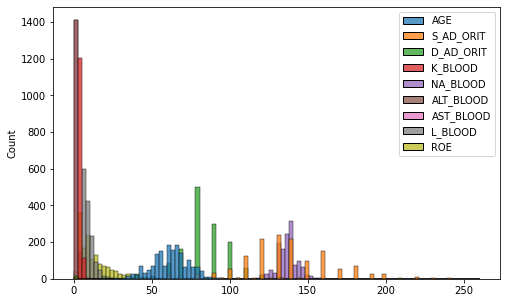

In [302]:
ax = sns.histplot(df[numeric_attributes],bins=100)

In [306]:
len(bin_attributes+ord_attributes+numeric_attributes+Y_labels)

120

In [307]:
len(list(df.columns))

120

In [167]:
colums_id_Y = [df.columns.get_loc(c) for c in Y_labels if c in df]

#### Note: the data set is quite imbalanced, but there is no missing values in the outcome features

In [175]:
df[Y_labels].count()

FIBR_PREDS    1688
PREDS_TAH     1688
JELUD_TAH     1688
FIBR_JELUD    1688
A_V_BLOK      1688
OTEK_LANC     1688
RAZRIV        1688
DRESSLER      1688
ZSN           1688
REC_IM        1688
P_IM_STEN     1688
LET_IS        1688
DEAD          1688
dtype: int64

## Impute the missing values with KNN-impute

In [473]:
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

scaler = preprocessing.StandardScaler()

pipe = make_pipeline(scaler, KNNImputer(n_neighbors=3))

imputer = KNNImputer(n_neighbors=3)
df_i = pipe.fit_transform(df)
df_i = scaler.inverse_transform(df_i)

sf_df = pd.DataFrame(df_i, index=df.index, columns=df.columns)

# Round the ordinal values to int

In [474]:
sf_df[ord_attributes]= sf_df[ord_attributes].apply(round,axis=1)

# Round the binary values to int

In [475]:
sf_df[bin_attributes]= sf_df[bin_attributes].apply(round,axis=1)

In [476]:
sf_df.count()

AGE          1688
SEX          1688
INF_ANAM     1688
STENOK_AN    1688
FK_STENOK    1688
             ... 
ZSN          1688
REC_IM       1688
P_IM_STEN    1688
LET_IS       1688
DEAD         1688
Length: 120, dtype: int64

# Make one hot for ordinal attributes

In [478]:
sf_df_dum = pd.get_dummies(sf_df, columns=ord_attributes)

In [479]:
sf_df_dum.count()

AGE             1688
SEX             1688
SIM_GIPERT      1688
nr_11           1688
nr_01           1688
                ... 
TIME_B_S_5.0    1688
TIME_B_S_6.0    1688
TIME_B_S_7.0    1688
TIME_B_S_8.0    1688
TIME_B_S_9.0    1688
Length: 200, dtype: int64

### Correlation matrix

Text(0.5, 1.0, 'Correlation matrix')

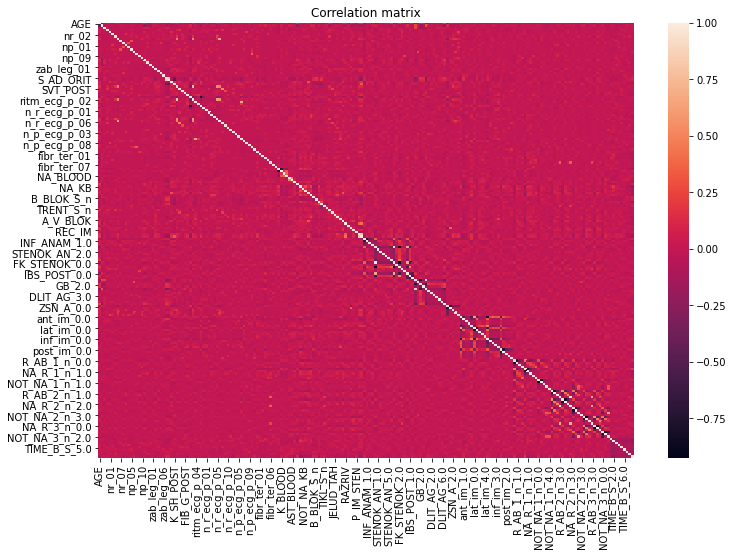

In [480]:
plt.rcParams["figure.figsize"] = (12,8)
sns.heatmap(sf_df_dum.corr())
plt.title("Correlation matrix")

## Separate X and Y

In [481]:
x_cols = bin_attributes+ord_attributes+numeric_attributes
y_cols = Y_labels

In [482]:
x_cols = [x for x in sf_df_dum.columns if x not in Y_labels]

In [483]:
X = sf_df_dum[x_cols]
Y = sf_df_dum[y_cols]

In [496]:
scaler.fit(X)
X_sc = scaler.transform(X)
Y_dead = Y["DEAD"].to_numpy().astype(int)

In [504]:
Y_dead = Y["DEAD"].to_numpy()

In [516]:
Y_dead = Y_dead.round().astype(int)

# Train a model

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best estimator: Pipeline(steps=[('sgd',
                 SGDClassifier(alpha=0.0025529080682395165, max_iter=10000,
                               penalty='elasticnet'))])
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best estimator: Pipeline(steps=[('sgd',
                 SGDClassifier(alpha=0.03409285069746811, max_iter=10000,
                               penalty='elasticnet'))])
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best estimator: Pipeline(steps=[('sgd',
                 SGDClassifier(alpha=0.009329304026284686, max_iter=10000,
                               penalty='elasticnet'))])
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
best estimator: Pipeline(steps=[('sgd',
                 SGDClassifier(alpha=0.008504489341802677, max_iter=10000,
                               penalty='elasticnet'))])
Fitting 5 folds for each of 200 candidates, totalling 1000 f

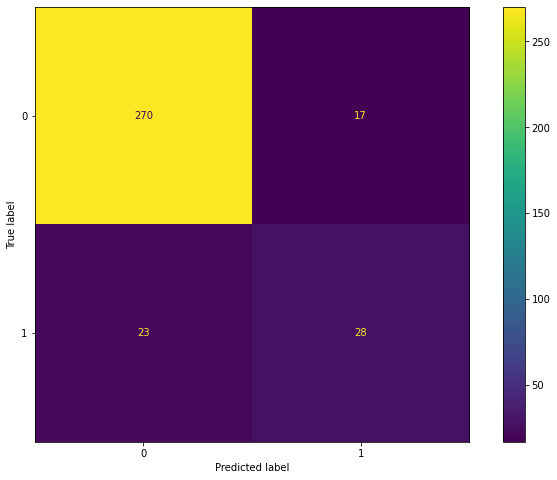

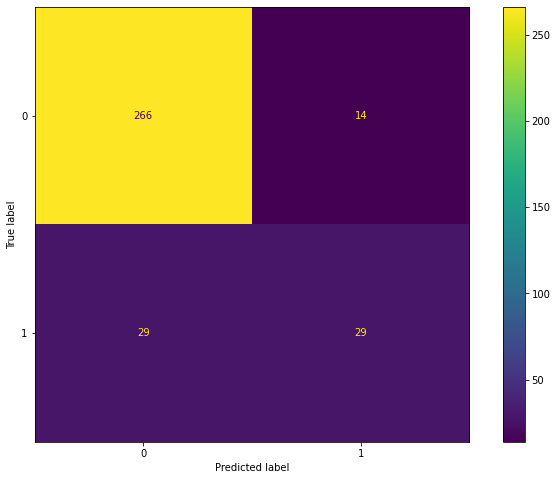

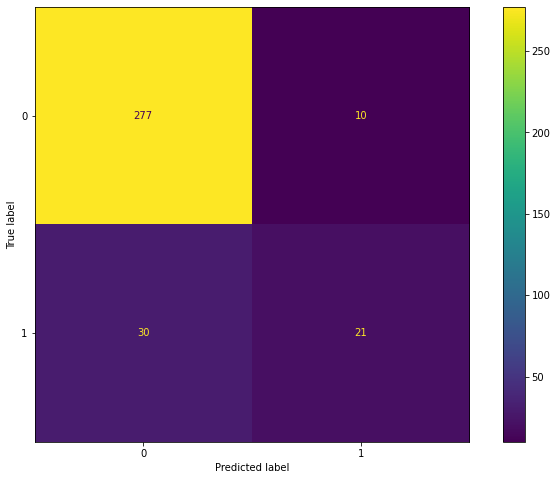

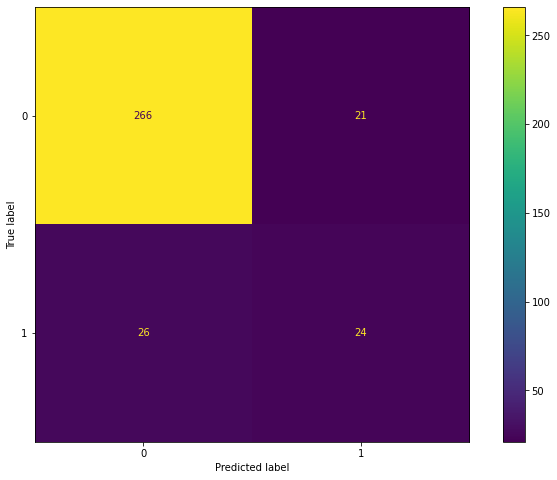

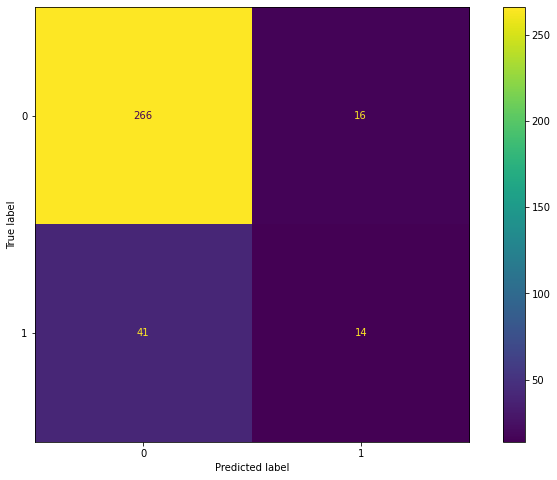

In [530]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score,plot_confusion_matrix
from sklearn.pipeline import Pipeline

inner_cv = KFold(n_splits=5, shuffle=True)
scores = []

for idx, (train_ids,test_ids) in enumerate(inner_cv.split(X)):
    x_train, x_test = X_sc[train_ids],X_sc[test_ids]
    y_train, y_test = Y_dead[train_ids],Y_dead[test_ids]
    
    param_grid = {
        'sgd__alpha': np.logspace(-4,4,200)
    }

    model = Pipeline([
                          ("sgd",SGDClassifier(penalty = 'elasticnet',max_iter=10000))])

    cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1,scoring="f1")

    cv_grid.fit(x_train, y_train)
    print(f'best estimator: {cv_grid.best_estimator_}')

    y_pred = cv_grid.predict(x_test)
    plot_confusion_matrix(cv_grid, x_test, y_test)  
    scores.append(balanced_accuracy_score(y_pred,y_test))

print(np.mean(scores))

In [526]:
scores

[0.7609146628948609,
 0.7905379256965944,
 0.751140350877193,
 0.687807881773399,
 0.782129683556591]

In [520]:
inner_cv = KFold(n_splits=3, shuffle=True)
train_ids,test_ids = inner_cv.split(X)

x_train, x_test = X_sc[train_ids],X_sc[test_ids]
y_train, y_test = Y_dead[train_ids],Y_dead[test_ids]

param_grid = {
    'sgd__alpha': np.logspace(-4,4,100)
}

model = Pipeline([
                      ("sgd",SGDClassifier(penalty = 'elasticnet',max_iter=10000))])

cv_grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1,scoring="balanced_accuracy")

cv_grid.fit(x_train, y_train)
print(f'best estimator: {cv_grid.best_estimator_}')

plot_confusion_matrix(cv_grid, x_test, y_test)  

ValueError: too many values to unpack (expected 2)

In [521]:
inner_cv.split(X)

<generator object _BaseKFold.split at 0x1409856d0>